## Dirichlet distribution

### Reza Bagheri

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from scipy.stats import dirichlet, multinomial, beta
from math import pi
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
%matplotlib inline

In [2]:
dist = dirichlet([5, 5, 5])
dist.pdf([0.5, 0.3, 0.2])
print("PDF at [5,5,5]: ",dist.pdf([0.5, 0.3, 0.2]))
print("Mean of disitrubtion: ", dist.mean())

PDF at [5,5,5]:  5.1081030000000025
Mean of disitrubtion:  [0.33333333 0.33333333 0.33333333]


In [3]:
# This results in an error
# dist.pdf([0.5, 0.3, 0.3])

In [4]:
H = np.tan(pi/3)*0.5
edges = np.array([[0, 0], [1, 0], [0.5, H]])
shifted_edges = np.roll(edges, 1, axis=0)
triangle = tri.Triangulation(edges[:, 0], edges[:, 1])

# For each edge of the triangle, the pair of other edges
edge_pairs = [edges[np.roll(range(3), -i)[1:]] for i in range(3)]
# The normal vectors for each side of the triangle
normal_vecs = np.array([[pair[0,1] - pair[1,1],
                         pair[1,0] - pair[0,0]] for pair in edge_pairs])

In [5]:
def cart_to_bc(coords):
    '''Converts 2D Cartesian coordinates to barycentric'''
    bc_coords = np.sum((np.tile(coords, (3, 1))-shifted_edges)*normal_vecs, axis=1) / \
                np.sum((edges-shifted_edges)*normal_vecs, axis=1)
    return np.clip(bc_coords, 1.e-10, 1.0 - 1.e-10)

def bc_to_cart(coords):
    '''Converts barycentric coordinates to 2D Cartesian'''
    return (edges * coords.reshape(-1, 1)).sum(axis=0)  

In [6]:
def plot_contours(dist, nlevels=200, subdiv=8, ax=None):
    refiner = tri.UniformTriRefiner(triangle)
    mesh = refiner.refine_triangulation(subdiv=subdiv)
    pdf_vals = [dist.pdf(cart_to_bc(coords)) for coords in zip(mesh.x, mesh.y)]
    if ax:
        contours = ax.tricontourf(mesh, pdf_vals, nlevels, cmap='jet')
        ax.set_aspect('equal')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, H)
        ax.set_axis_off()
    else:
        contours = plt.tricontourf(mesh, pdf_vals, nlevels, cmap='jet')
        plt.axis('equal')
        plt.xlim(0, 1)
        plt.ylim(0, H)
        plt.axis('off')
    return contours

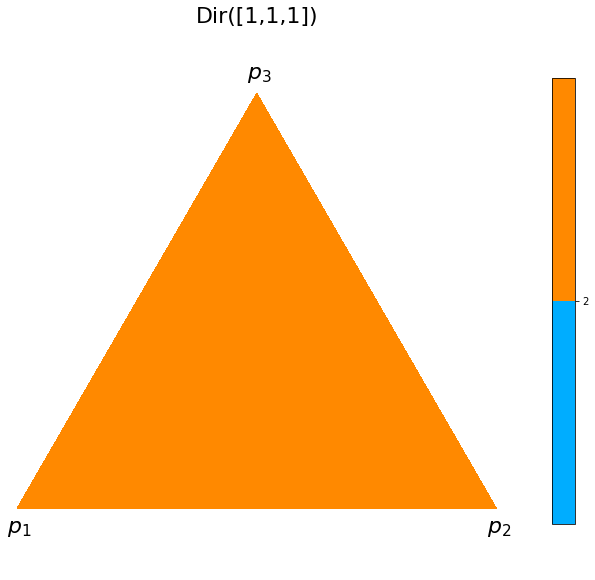

In [7]:
plt.figure(figsize=(10, 10))
contours = plot_contours(dirichlet([1, 1, 1]))
v = np.linspace(0, 3, 2, endpoint=True)
plt.colorbar(contours, ticks=[1,2,3], fraction=0.04, pad=0.1)
plt.text(0-0.02, -0.05, "$p_1$", fontsize=22)
plt.text(1-0.02, -0.05, "$p_2$", fontsize=22)
plt.text(0.5-0.02, H+0.03, "$p_3$", fontsize=22)
plt.title("Dir([1,1,1])", fontsize=22)
plt.show()

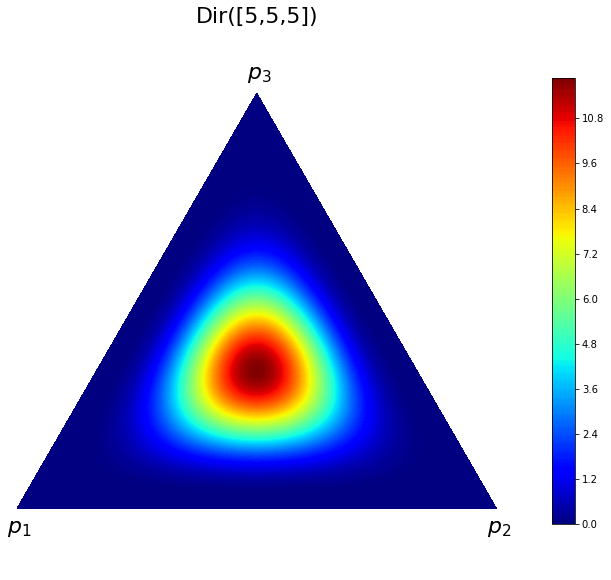

In [8]:
plt.figure(figsize=(10, 10))
contours = plot_contours(dirichlet([5, 5, 5]))
plt.colorbar(contours, fraction=0.04, pad=0.1)
plt.text(0-0.02, -0.05, "$p_1$", fontsize=22)
plt.text(1-0.02, -0.05, "$p_2$", fontsize=22)
plt.text(0.5-0.02, H+0.03, "$p_3$", fontsize=22)
plt.title("Dir([5,5,5])", fontsize=22)
plt.show()

In [9]:
def plot_surface(dist, ax, nlevels=200, subdiv=8, log_plot=False, **args):
    refiner = tri.UniformTriRefiner(triangle)
    mesh = refiner.refine_triangulation(subdiv=subdiv)
    pdf_vals = [dist.pdf(cart_to_bc(coords)) for coords in zip(mesh.x, mesh.y)]
    pdf_vals = np.array(pdf_vals, dtype='float64')
    if log_plot:
        pdf_vals = np.log(pdf_vals)
    ax.plot_trisurf(mesh.x, mesh.y, pdf_vals, linewidth=1, **args)

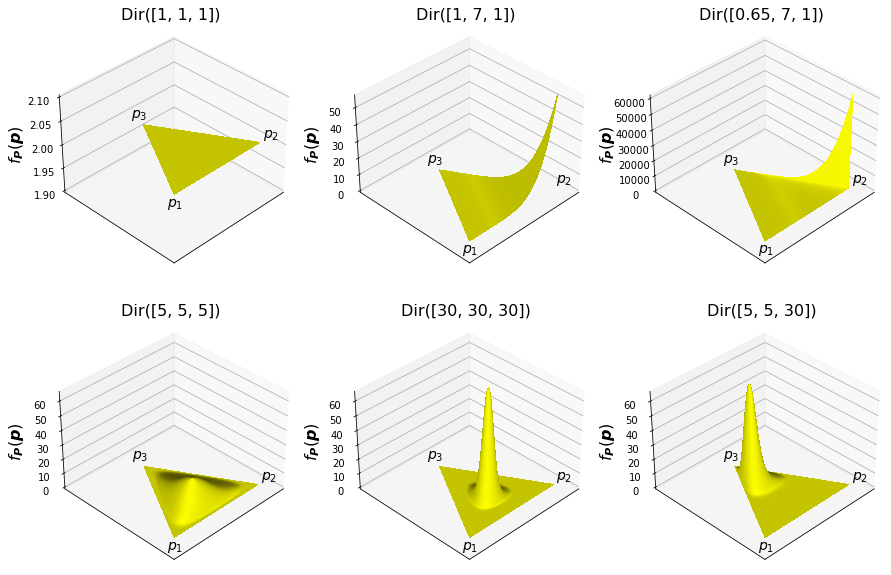

In [10]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(231, projection='3d')
ax2 = fig.add_subplot(232, projection='3d')
ax3 = fig.add_subplot(233, projection='3d')
ax4 = fig.add_subplot(234, projection='3d')
ax5 = fig.add_subplot(235, projection='3d')
ax6 = fig.add_subplot(236, projection='3d')

ax = [ax1, ax2, ax3, ax4, ax5, ax6]
params = [[1,1,1], [1,7,1], [0.65,7,1], [5,5,5], [30,30,30], [5, 5, 30]]

for i in range(6):
    plot_surface(dirichlet(params[i]), ax[i], antialiased=False, color='yellow')
    ax[i].view_init(35, -135)
    ax[i].set_title("Dir({})".format(params[i]), fontsize=16)
    ax[i].zaxis.set_rotate_label(False) 
    ax[i].set_zlabel("$f_\mathregular{P}(\mathregular{p})$", fontsize=16,
                     weight="bold", style="italic", labelpad=5, rotation=90)
    ax[i].set_xlim([-0.15, 1.1])
    ax[i].set_ylim([-0.15, 1.1])
    if i>2:
        ax[i].set_zlim([0, 65])
    ax[i].xaxis.set_ticklabels([])
    ax[i].yaxis.set_ticklabels([])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    if i==0:
        ax[i].text(-0.15, -0.07, 2, "$p_1$", fontsize=14)
        ax[i].text(1.07, 0.03, 2, "$p_2$", fontsize=14)
        ax[i].text(0.5, H+0.15, 2, "$p_3$", fontsize=14)
    else:
        ax[i].text(-0.15, -0.07, 0, "$p_1$", fontsize=14)
        ax[i].text(1.07, 0.03, 0, "$p_2$", fontsize=14)
        ax[i].text(0.5, H+0.15, 0, "$p_3$", fontsize=14)

plt.show()

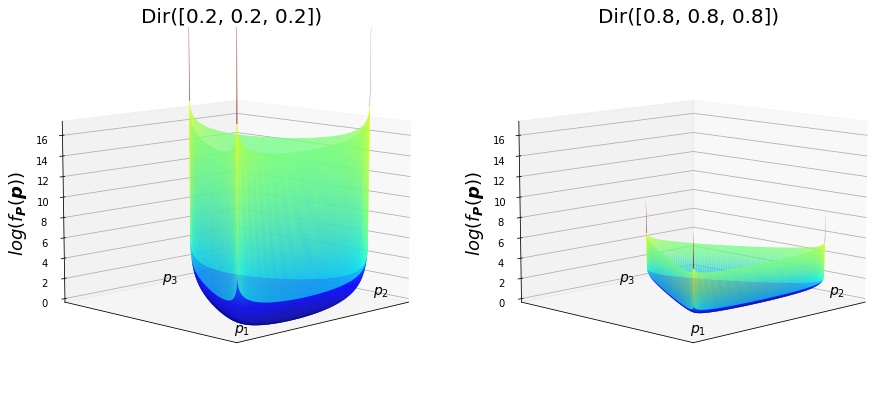

In [11]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax = [ax1, ax2]
params = [[0.2, 0.2, 0.2], [0.8,0.8,0.8], [0.2,0.5,1]]

for i in range(2):
    plot_surface(dirichlet(params[i]), ax[i], log_plot=True, cmap='jet')
    ax[i].view_init(10, -135)
    ax[i].set_title("Dir({})".format(params[i]), fontsize=20)
    ax[i].zaxis.set_rotate_label(False) 
    ax[i].set_zlabel("$log(f_\mathregular{P}(\mathregular{p}))$", fontsize=18,
                     weight="bold", style="italic", labelpad=5, rotation=90)
    ax[i].set_xlim([-0.15, 1.1])
    ax[i].set_ylim([-0.15, 1.1])
    ax[i].set_zlim([0, 17])
    ax[i].xaxis.set_ticklabels([])
    ax[i].yaxis.set_ticklabels([])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].text(-0.09, -0.07, 0, "$p_1$", fontsize=14)
    ax[i].text(1.07, 0.03, 0, "$p_2$", fontsize=14)
    ax[i].text(0.5, H+0.22, 0, "$p_3$", fontsize=14)

plt.show()

In [12]:
p_act = np.array([0.6, 0.2, 0.2])
sample = multinomial.rvs(n=10, p=p_act, random_state=1)
sample

array([6, 3, 1])

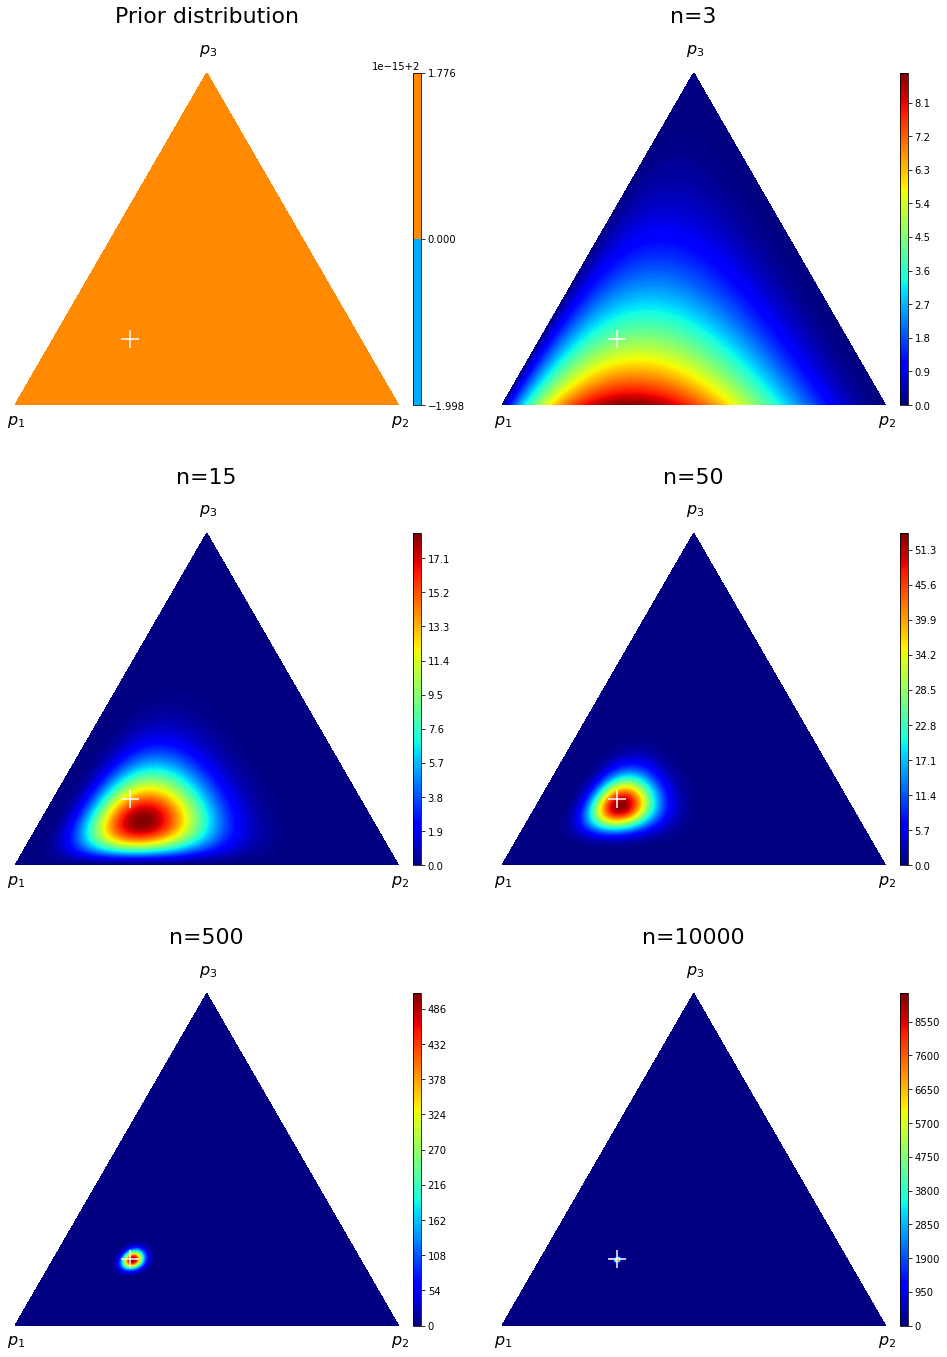

In [13]:
p_act_coords = bc_to_cart(p_act)

alpha_prior = [1, 1, 1]
number_rolls = [3, 15, 50, 500, 10000]
num_cols = 2

fig, axes = plt.subplots(3, num_cols, figsize=(16, 25))
plt.subplots_adjust(wspace=0.2, hspace=0.05)

contours = plot_contours(dirichlet(alpha_prior), ax=axes[0, 0])
axes[0, 0].set_title("Prior distribution", fontsize=22, pad=50)
axes[0, 0].scatter(p_act_coords[0],
                   p_act_coords[1],
                   s=300, color='white',
                   marker='+')
axes[0, 0].text(0-0.02, -0.05, "$p_1$", fontsize=16)
axes[0, 0].text(1-0.02, -0.05, "$p_2$", fontsize=16)
axes[0, 0].text(0.5-0.02, H+0.05, "$p_3$", fontsize=16)
divider = make_axes_locatable(axes[0, 0])
cax = divider.append_axes('right', size='2%', pad=0.2)
cbar = fig.colorbar(contours, cax=cax)

for i in range(1, 6):
    m= multinomial.rvs(n=number_rolls[i-1], p=p_act, random_state=0)
    contours = plot_contours(dirichlet(m + alpha_prior), ax=axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_title("n={}".format(number_rolls[i-1]),
                                                fontsize=22, pad=50)
    axes[i // num_cols, i % num_cols].scatter(p_act_coords[0],
                                              p_act_coords[1],
                                              s=300, color='white',
                                              marker='+')
    axes[i // num_cols, i % num_cols].text(0-0.02, -0.05, "$p_1$", fontsize=16)
    axes[i // num_cols, i % num_cols].text(1-0.02, -0.05, "$p_2$", fontsize=16)
    axes[i // num_cols, i % num_cols].text(0.5-0.02, H+0.05, "$p_3$", fontsize=16)
    divider = make_axes_locatable(axes[i // num_cols, i % num_cols])
    cax = divider.append_axes('right', size='2%', pad=0.2)
    cbar = fig.colorbar(contours, cax=cax)

plt.show()

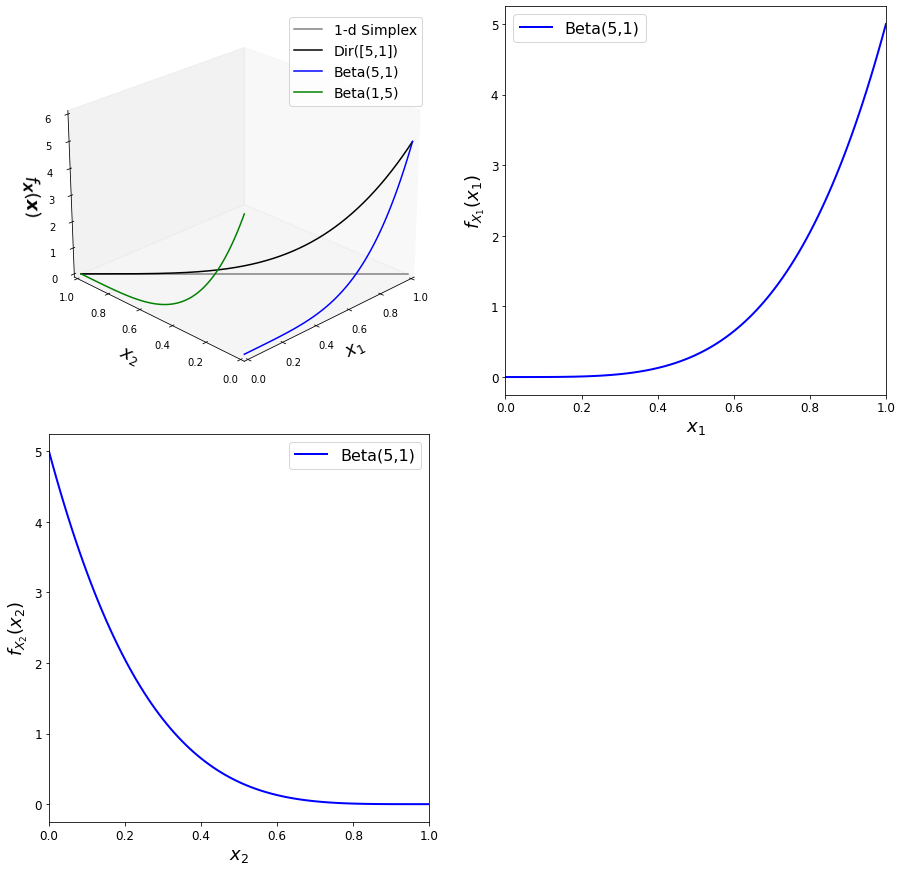

In [14]:
N = 1000
simplex_edges = np.array([[1,0], [0,1]])
tol=1e-6
gamma1 = np.linspace(tol, 1-tol, N)
gamma2 = 1-gamma1
bc_coords = np.stack((gamma1, gamma2), axis=-1)
cart_coords = gamma1.reshape(-1,1)*simplex_edges[0] + gamma2.reshape(-1,1)*simplex_edges[1]
alpha = [5, 1]
pdf = [dirichlet(alpha).pdf(x) for x in bc_coords]

x = np.arange(0, 1.01, 0.01)
param_list = [(1,1), (2,2), (5,1)]
beta_dist1 = beta.pdf(x=x, a=alpha[0], b=alpha[1])
beta_dist2 = beta.pdf(x=x, a=alpha[1], b=alpha[0])

fig = plt.figure(figsize=(15, 15))
plt.subplots_adjust(wspace=0.2, hspace=0.1)
gs = gridspec.GridSpec(2, 2, width_ratios=[2.5, 1],
                       height_ratios=[1, 2.5])
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

ax1.plot(simplex_edges[:,0], simplex_edges[:,1], [0,0], color = 'gray', label='1-d Simplex')
ax1.plot(cart_coords[:,0], cart_coords[:,1], pdf, color = 'black',
         label='Dir([{},{}])'.format(alpha[0], alpha[1]))
ax1.plot(x, [0]*len(x), beta_dist1, color = 'blue',
         label='Beta({},{})'.format(alpha[0], alpha[1]))
ax1.plot([0]*len(x), x, beta_dist2, color = 'green',
         label='Beta({},{})'.format(alpha[1], alpha[0]))

ax1.view_init(25, -135)
ax1.set_xlabel("$x_1$", fontsize=18)
ax1.set_ylabel("$x_2$", fontsize=18, labelpad= 9)
ax1.set_zlabel("$f_\mathregular{X}(\mathregular{x})$", fontsize=18,
               weight="bold", style="italic", labelpad= 2, rotation = 45)
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_zlim([0, 6])
ax1.grid(False)
ax1.legend(loc='best', fontsize= 14)

ax2.plot(x, beta_dist1, label='Beta({},{})'.format(alpha[0],
         alpha[1]), linewidth=2, color='blue')
ax2.set_xlabel('$x_1$', fontsize=18)
ax2.set_ylabel('$f_{X_1}(x_1)$', fontsize=18)
ax2.legend(loc='upper left', fontsize= 16)
ax2.set_xlim([0,1])
ax2.tick_params(axis='both', which='major', labelsize=12)

ax3.plot(x, beta_dist2, label='Beta({},{})'.format(alpha[0],
         alpha[1]), linewidth=2, color='blue')
ax3.set_xlabel('$x_2$', fontsize=18)
ax3.set_ylabel('$f_{X_2}(x_2)$', fontsize=18)
ax3.legend(loc='upper right', fontsize= 16)
ax3.set_xlim([0,1])
ax3.tick_params(axis='both', which='major', labelsize=12)

plt.show()

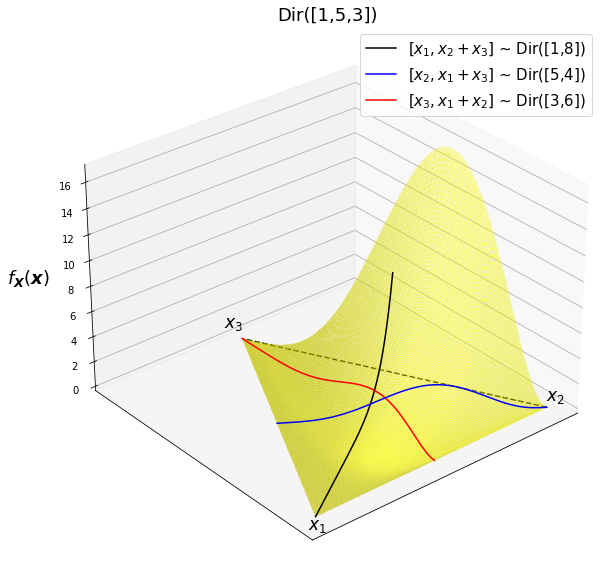

In [15]:
N = 1000
alpha = [1, 5, 3]

edges_marg_x1 = np.array([[0,0], [0.75,0.5*np.cos(pi/6)]])
edges_marg_x2 = np.array([[1,0], [0.25,0.5*np.cos(pi/6)]])
edges_marg_x3 = np.array([[0.5,H], [0.5,0]])
tol=1e-6
gamma1 = np.linspace(tol, 1-tol, N)
gamma2 = 1-gamma1
bc_coords = np.stack((gamma1, gamma2), axis=-1)
marg_x1_cart_coords = gamma1.reshape(-1,1)*edges_marg_x1[0] + gamma2.reshape(-1,1)*edges_marg_x1[1]
marg_x2_cart_coords = gamma1.reshape(-1,1)*edges_marg_x2[0] + gamma2.reshape(-1,1)*edges_marg_x2[1]
marg_x3_cart_coords = gamma1.reshape(-1,1)*edges_marg_x3[0] + gamma2.reshape(-1,1)*edges_marg_x3[1]

alpha_agg1 = [alpha[0], alpha[1]+alpha[2]]
alpha_agg2 = [alpha[1], alpha[0]+alpha[2]]
alpha_agg3 = [alpha[2], alpha[0]+alpha[1]]

pdf1 = [dirichlet(alpha_agg1).pdf(x) for x in bc_coords]
pdf2 = [dirichlet(alpha_agg2).pdf(x) for x in bc_coords]
pdf3 = [dirichlet(alpha_agg3).pdf(x) for x in bc_coords]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
plot_surface(dirichlet(alpha), ax, antialiased=False, color='yellow', alpha=0.15)
ax.plot([1,0.5], [0, H], [0, 0], "--", color='black')

ax.plot(marg_x1_cart_coords[:,0], marg_x1_cart_coords[:,1], pdf1, color = 'black',
        zorder=10, label="$[x_1, x_2+x_3]$ ~ Dir([{},{}])".format(alpha_agg1[0], alpha_agg1[1]))
ax.plot(marg_x2_cart_coords[:,0], marg_x2_cart_coords[:,1], pdf2, color = 'blue',
        zorder=12, label="$[x_2, x_1+x_3]$ ~ Dir([{},{}])".format(alpha_agg2[0], alpha_agg2[1]))
ax.plot(marg_x3_cart_coords[:,0], marg_x3_cart_coords[:,1], pdf3, color = 'red',
        zorder=10, label="$[x_3, x_1+x_2]$ ~ Dir([{},{}])".format(alpha_agg3[0], alpha_agg3[1]))

ax.view_init(30, -130)
ax.set_title("Dir([{},{},{}])".format(alpha[0], alpha[1], alpha[2]), fontsize=18)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel("$f_\mathregular{X}(\mathregular{x})$", fontsize=18,
               weight="bold", style="italic", labelpad=15)
ax.set_zlim([0, 17])

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.legend(loc='best', fontsize=15)

ax.text(-0.06, -0.03, 0, "$x_1$", fontsize=17)
ax.text(1.03, 0.03, 0, "$x_2$", fontsize=17)
ax.text(0.5, H+0.09, 0, "$x_3$", fontsize=17)

plt.show()